In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('radius_time_sweep_fm_main.csv')
df2 = pd.read_csv('radius_time_sweep_high_b.csv')
df3 = pd.read_csv('radius_time_sweep_low_b.csv')
df4 = pd.read_csv('radius_time_sweep_max_slip.csv')

In [4]:
df = pd.concat([df1, df2, df3, df4])

In [5]:
df.head(1)

,radius,start_time,a_avg,b_avg,bstd_avg,n_avg,mc_avg,a_std,b_std,bstd_std,n_std,mc_std
0,1.0,1990-01-31 00:00:00+00:00,5.047954,2.902517,7.535743e-16,3.993289,1.080201,5.394361,2.943742,3.411580e-15,1.908888,0.287982


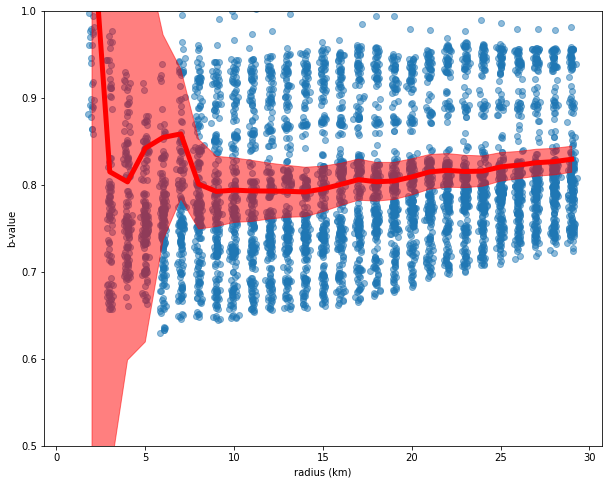

In [50]:
df['start_time_int'] = pd.to_datetime(df.start_time).astype('int')


fig, ax = plt.subplots(figsize=(10, 8))
# df.plot(kind='scatter', x='radius', y='b_avg', ax=ax, c='start_time_int', cmap='viridis')
# df.plot(kind='scatter', x=np.random.normal(df['radius'],0.01,df['radius'].shape[0]), y='b')
ax.scatter(x=np.random.normal(df['radius'],0.1,df['radius'].shape[0]), y=df['b_avg'].values, alpha=0.5)
ax.plot(df[df.b_avg < 1.5].groupby('radius').b_avg.mean(), color='red', linewidth=5)

b_avg = df[df.b_avg < 1.5].groupby('radius').b_avg.mean()
upper = b_avg + df[df.b_avg < 1.5].groupby('radius').b_std.mean()
lower = b_avg - df[df.b_avg < 1.5].groupby('radius').b_std.mean()

ax.fill_between(np.arange(2, 30, 1), lower, upper, alpha=0.5, color='red')

ax.set_ylim(0.5, 1)

ax.set_ylabel('b-value')
ax.set_xlabel('radius (km)')

In [42]:
lower.shape

(28,)

In [36]:
df[df.b_avg < 1.5].groupby('radius').b_std.mean()

radius
2.0     0.957509
3.0     0.351134
4.0     0.204870
5.0     0.222675
6.0     0.117895
7.0     0.074425
8.0     0.051623
9.0     0.040378
10.0    0.037081
11.0    0.035110
12.0    0.032065
13.0    0.029845
14.0    0.028405
15.0    0.026207
16.0    0.024247
17.0    0.023614
18.0    0.022237
19.0    0.021357
20.0    0.020782
21.0    0.019913
22.0    0.019317
23.0    0.018640
24.0    0.017380
25.0    0.016391
26.0    0.015710
27.0    0.015499
28.0    0.015245
29.0    0.014959
Name: b_std, dtype: float64

In [28]:
df[df.b_avg <= 1.0][['radius', 'b_avg']].corr()

,radius,b_avg
radius,1.000000,0.205283
b_avg,0.205283,1.000000


In [14]:
np.random.normal(df['radius'],0.01,df['radius'].shape[0])

array([  0.99709925,   0.98224373,   1.00676457, ...,  28.99731657,
        28.99894038,  29.00053895])

In [51]:
polygon_selection.distance_between_two_coordinates(0,179.9, 0, -179.9)

40006.162000000004